In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from highlight_text import fig_text, ax_text

df = pd.read_csv('GCB2022v27_percapita_flat.csv')
df = df[df['Year']==df['Year'].max()]
print(f'Shape: {df.shape}')
print(df.isna().sum())
df.head()

Shape: (232, 10)
Country                 0
ISO 3166-1 alpha-3      6
Year                    0
Total                  11
Coal                   12
Oil                    12
Gas                    12
Cement                 15
Flaring                12
Other                 185
dtype: int64


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
271,Afghanistan,AFG,2021,0.296119,0.104828,0.185029,0.005956,0.000306,0.000000,NaN
543,Albania,ALB,2021,1.618066,0.061096,1.137164,0.052631,0.367175,0.000000,NaN
815,Algeria,DZA,2021,3.989977,0.024798,1.268066,2.100412,0.249628,0.347072,NaN
1087,Andorra,AND,2021,5.730292,0.000000,5.730292,0.000000,0.000000,0.000000,NaN
1359,Angola,AGO,2021,0.619141,0.000000,0.402904,0.085536,0.032568,0.098133,NaN


In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['continent'] == 'Europe']
data = world.merge(df, how='left', left_on='name', right_on='Country')
data = data[data['Country'] != 'Russia']
data = data[['Country', 'Total', 'geometry']]
data = data.dropna()
data = data.sort_values('Total', ascending=False)
data.head()

/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_31614/1502522719.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,Country,Total,geometry
1,Norway,7.573273,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,France,4.741312,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
3,Sweden,3.424918,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,Belarus,6.222741,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
5,Ukraine,4.637058,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."


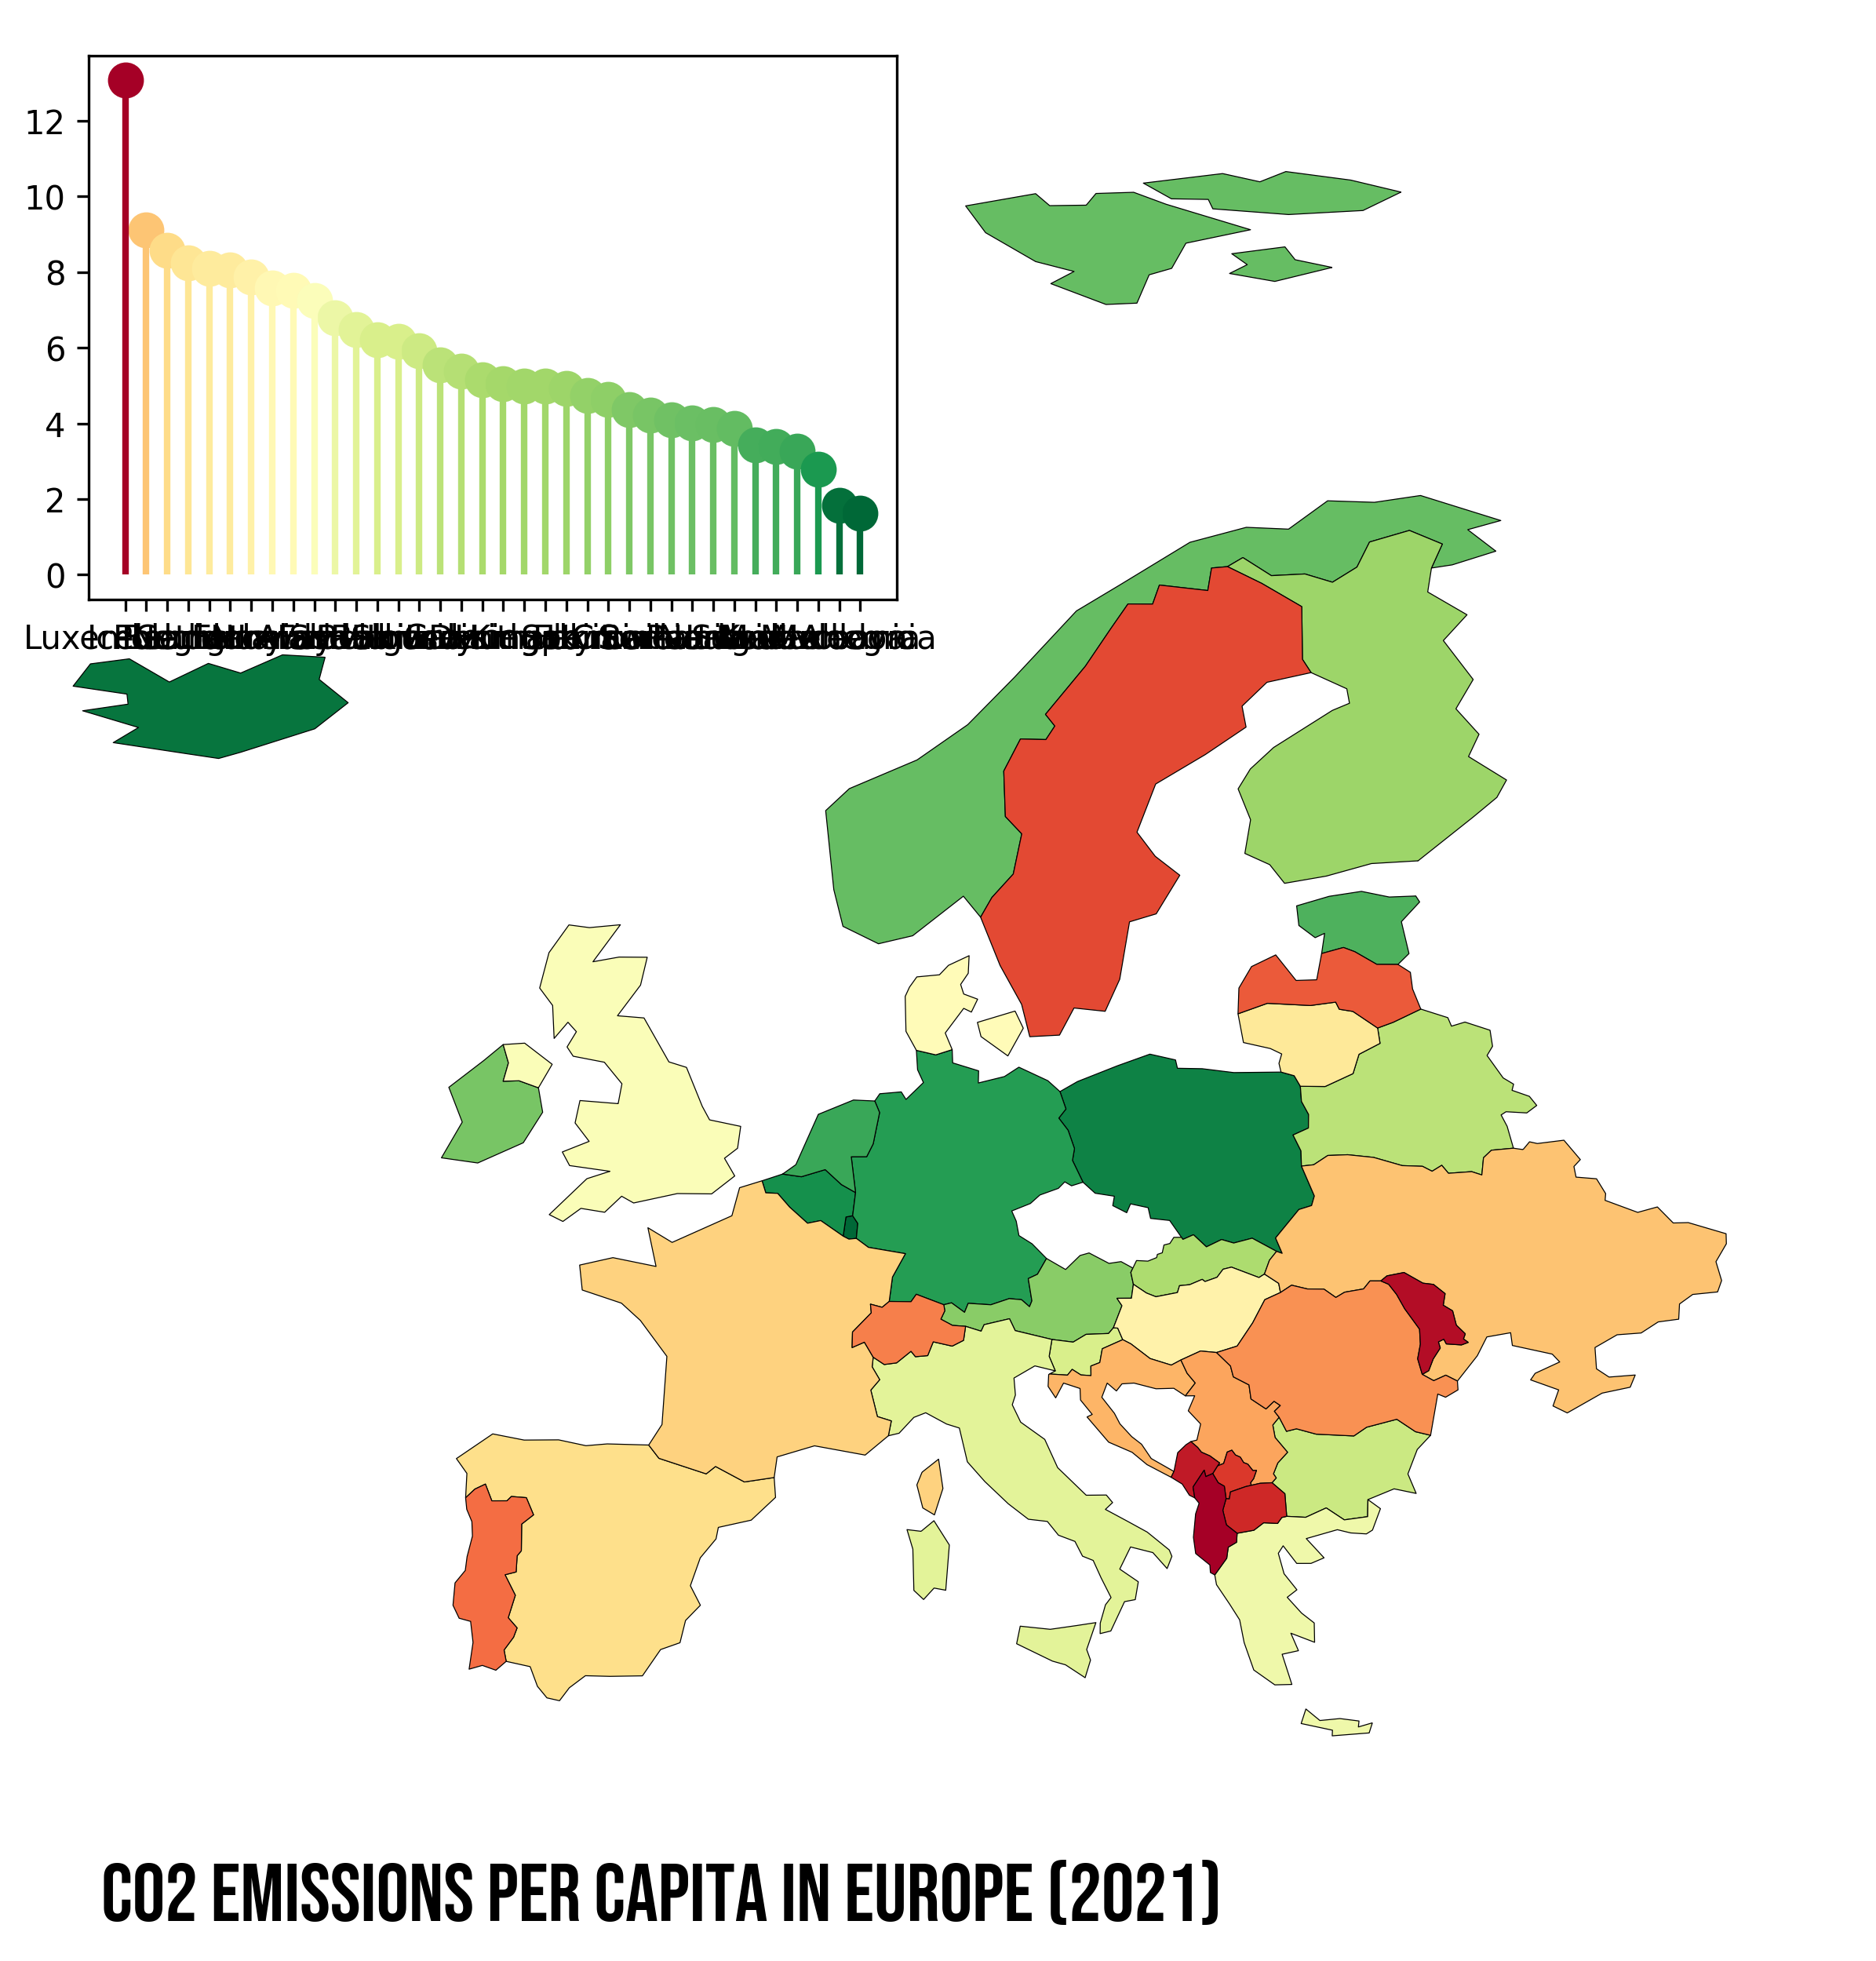

In [74]:
# load the colormap
cmap = load_cmap('RdYlGn_r', type='continuous')

# load the font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'BebasNeue-Regular.ttf'
font = FontProperties(fname=font_path)

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax, cmap=cmap, edgecolor='black', linewidth=0.3)

# custom axis
ax.set_xlim(-25, 45)
ax.set_ylim(32, 85)
ax.set_axis_off()

# lollipop plot in the sub axes
sub_ax = inset_axes(
   parent_axes=ax,
   width="45%",
   height="30%",
   loc='upper left',
   borderpad=1
)

# create the lollipop plot
max_value = data['Total'].max()
min_value = data['Total'].min()
for i, (country, total) in enumerate(data[['Country', 'Total']].values):
   total_norm = (total - min_value) / (max_value - min_value)
   sub_ax.scatter(country, total, s=100, color=cmap(total_norm))
   sub_ax.vlines(country, 0, total, color=cmap(total_norm), lw=2)

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.15, y=0.1,
   color='black', fontsize=25, font=font, ha='left', va='top', ax=ax
)

# display the plot
plt.savefig('map.png', dpi=300)
plt.show()

In [ ]:
# compute centroids and display the total
# data_projected = data.to_crs(epsg=3035)
# data_projected['centroid'] = data_projected.geometry.centroid
# data['centroid'] = data_projected['centroid'].to_crs(data.crs)
# countries_to_annotate = data['Country'].tolist()
# for country in countries_to_annotate:
#    centroid = data.loc[data['Country'] == country, 'centroid'].values[0]
#    x, y = centroid.coords[0]
#    rate = data.loc[data['Country'] == country, 'Total'].values[0]